In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dados = {
    'Idade (anos)': [5, 10, 3, 8, 1, 15],
    'Histórico de Manutenção': ['Bom', 'Ruim', 'Excelente', 'Regular', 'Excelente', 'Ruim'],
    'Número de Falhas Anteriores': [0, 3, 0, 2, 0, 5],
    'Nível de Automação': ['Alto', 'Baixo', 'Médio', 'Alto', 'Médio', 'Baixo'],
    'Classificação': ['Segura', 'Não Segura', 'Segura', 'Não Segura', 'Segura', 'Não Segura']
}

df = pd.DataFrame(dados)
print("Dataset:")
print(df)
print()

Dataset:
   Idade (anos) Histórico de Manutenção  Número de Falhas Anteriores  \
0             5                     Bom                            0   
1            10                    Ruim                            3   
2             3               Excelente                            0   
3             8                 Regular                            2   
4             1               Excelente                            0   
5            15                    Ruim                            5   

  Nível de Automação Classificação  
0               Alto        Segura  
1              Baixo    Não Segura  
2              Médio        Segura  
3               Alto    Não Segura  
4              Médio        Segura  
5              Baixo    Não Segura  



In [9]:
le_historico = LabelEncoder()
le_automacao = LabelEncoder()
le_classificacao = LabelEncoder()

X = df.copy()
X['Histórico de Manutenção'] = le_historico.fit_transform(df['Histórico de Manutenção'])
X['Nível de Automação'] = le_automacao.fit_transform(df['Nível de Automação'])
X = X[['Idade (anos)', 'Histórico de Manutenção', 'Número de Falhas Anteriores', 'Nível de Automação']]

y = le_classificacao.fit_transform(df['Classificação'])

Acurácia: 100.00%



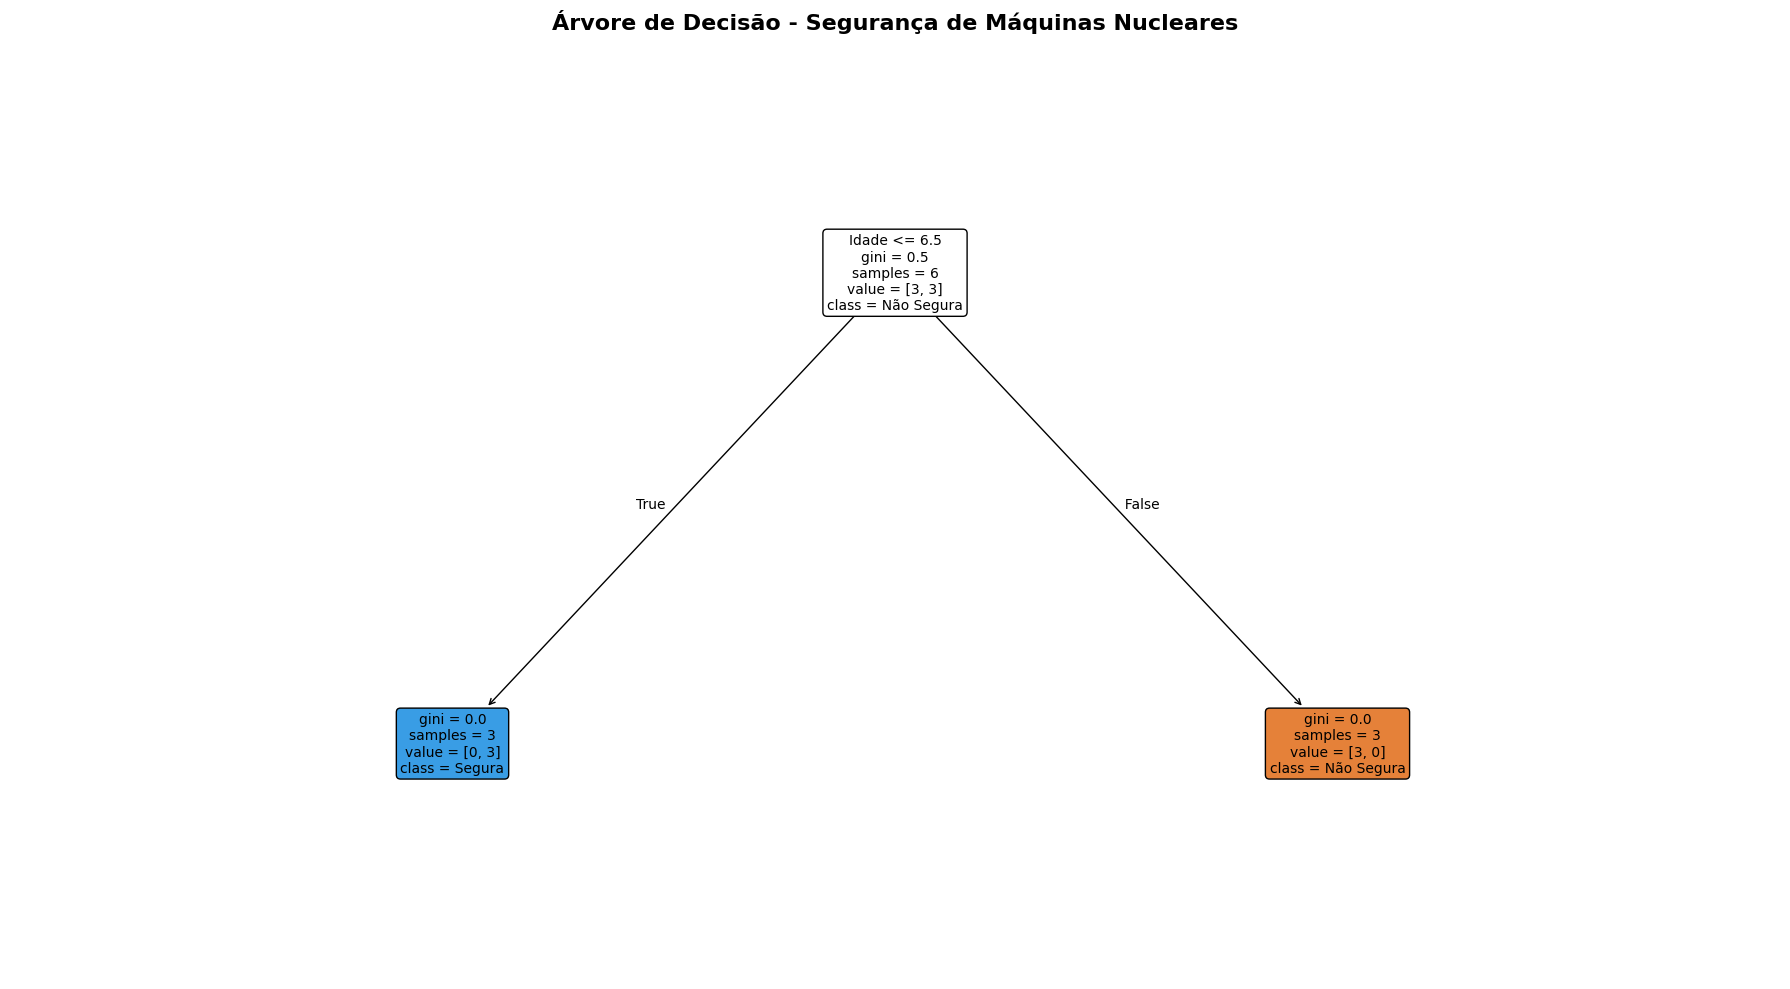

In [10]:
arvore = DecisionTreeClassifier(random_state=42, max_depth=4)
arvore.fit(X, y)

print(f"Acurácia: {arvore.score(X, y):.2%}\n")

plt.figure(figsize=(18, 10))
tree.plot_tree(arvore, 
               feature_names=['Idade', 'Histórico', 'Falhas', 'Automação'],
               class_names=['Não Segura', 'Segura'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Árvore de Decisão - Segurança de Máquinas Nucleares', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()